In [127]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np

#plots
import pylab as plt
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc

import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [128]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/results_hws.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout

In [129]:
df_test = pd.read_hdf('../../data/simulator/figure/Figure_hws/hws.h5')
# fdf1 = pd.read_hdf('../../data/simulator/figure/odor_stat.h5')
# fdf_predicted = pd.read_hdf('../../data/simulator/figure/odor_pr_stat.h5')
# traindf = pd.read_hdf('../../data/simulator/figure/odor_lt_stat.h5')
# traindf_predicted = pd.read_hdf('../../data/simulator/figure/odor_pr_lt_stat.h5')

In [130]:
dirname = '../../data/simulator/figure/Figure_hws/'
hmap_data = np.load(str(dirname) + "hmap.npz")
    
fitted_p_heatmap=hmap_data['fitted_heatmap']
xedges=hmap_data['xedges']
yedges=hmap_data['yedges']

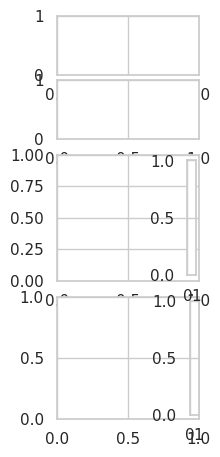

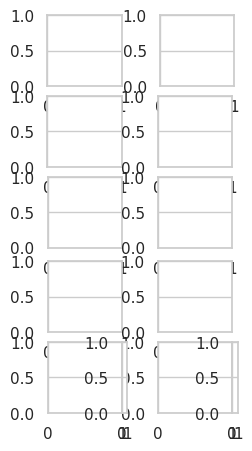

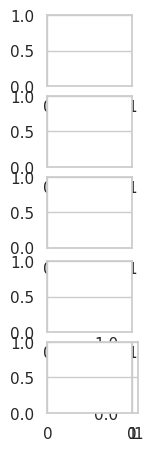

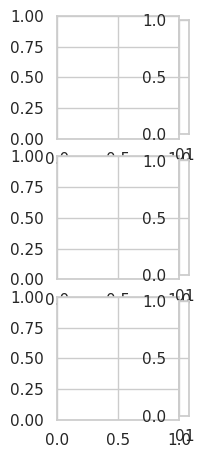

In [146]:
layout=load()

Fig1

In [132]:
ax=layout.axes[('fig1','ax')]
cax = ax.imshow(
    fitted_p_heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=0.01, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('Distance along Streakline, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.ticklabel_format(useOffset=False)

# ax.set_ylim(-40,50)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [133]:
ax = layout.axes[('fig1', 'cbar1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(Whiff Onset)$",rotation=90, labelpad=-20)

ax.set_yticklabels(['0', '.01'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig2

In [134]:
th=4.5
query1 = 'odor>4.5'
new_test_df1=pd.DataFrame()
new_test_df1 = df_test.query(query1)
new_test_df1.reset_index(inplace=True, drop=True)

query2 = 'predicted_odor>4.5'
new_test_df2=pd.DataFrame()
new_test_df2 = df_test.query(query2)
new_test_df2.reset_index(inplace=True, drop=True)

In [135]:
ax=layout.axes[('fig1','ax1')]
cax1 = ax.scatter(new_test_df1.distance_along_streakline, new_test_df1.nearest_from_streakline, c=new_test_df1.odor, s=1, edgecolors=None, cmap='Blues', alpha=0.2, vmin=0, vmax=10, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.ticklabel_format(useOffset=False)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [136]:
ax = layout.axes[('fig1', 'cbar2')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("odor, a.u",rotation=90, labelpad=-20)

ax.set_yticklabels(['4.5', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig3 - predicted odor scatter plot

In [137]:
ax=layout.axes[('fig1','ax2')]
cax1 = ax.scatter(new_test_df2.distance_along_streakline, new_test_df2.nearest_from_streakline, c=new_test_df2.predicted_odor, s = 1, edgecolors=None,  cmap='Reds', alpha=0.2, vmin=0, vmax=10, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [138]:
ax = layout.axes[('fig1', 'cbar3')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Reds', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("odor$_{pr}$, a.u",rotation=90, labelpad=-20)
ax.set_yticklabels(['4.5', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig4 Time series

In [147]:
ax=layout.axes[('fig2','ax3')]
ax.plot(df_test.time, df_test.odor, linewidth=1,c='#1764ab', rasterized=True)
ax.set_rasterization_zorder(-20)
xlimTs=[645,650]
ax.set_ylabel('o, a.u.')
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [148]:
ax=layout.axes[('fig2','ax3_1')]
ax.plot(df_test.time, df_test.predicted_odor, c='#bc141a', linewidth=1, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('o$_{pr}$, a.u.')
ax.yaxis.set_label_coords(-0.07, 0.5)

ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10],
                           xticks=xlimTs,
                           linewidth=0.5)
# ax.set_yticklabels([])
ax.set_xticklabels([])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig5 - Histogram

In [149]:
n_bins = 20
ylim = (0, 1)  # Set y-limit for normalized values

# Actual Whiff Data
df_actual = new_test_df1.copy()
bins = np.linspace(0, df_actual['distance_from_source'].max(), n_bins + 1)
df_actual['distance_bin'] = pd.cut(df_actual['distance_from_source'], bins=bins)

whiff_counts_actual = df_actual.groupby('distance_bin').size()
mean_concentrations_actual = df_actual.groupby('distance_bin')['odor'].mean()
bin_centers_actual = (bins[:-1] + bins[1:]) / 2

# Normalize actual whiff counts
whiff_counts_actual_normalized = whiff_counts_actual / whiff_counts_actual.max()

# Predicted Whiff Data
df_predicted = new_test_df2.copy()
bins_predicted = np.linspace(0, df_predicted['distance_from_source'].max(), n_bins + 1)
df_predicted['distance_bin'] = pd.cut(df_predicted['distance_from_source'], bins=bins_predicted)

whiff_counts_predicted = df_predicted.groupby('distance_bin').size()
mean_concentrations_predicted = df_predicted.groupby('distance_bin')['predicted_odor'].mean()
bin_centers_predicted = (bins_predicted[:-1] + bins_predicted[1:]) / 2

# Normalize predicted whiff counts
whiff_counts_predicted_normalized = whiff_counts_predicted / whiff_counts_predicted.max()


In [150]:
ax=layout.axes[('fig2','ax4')]
norm_actual = plt.Normalize(4, 10)
colors_actual = plt.cm.Blues(norm_actual(mean_concentrations_actual))
ax.bar(bin_centers_actual, whiff_counts_actual_normalized, width=(bins[1] - bins[0]), edgecolor='black', linewidth=0.5, color=colors_actual, rasterized= True)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Whiff Count')
ax.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=[0,50],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [151]:
ax = layout.axes[('fig2', 'cbar4_1')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc, a.u",rotation=90, labelpad=-17)
ax.set_yticklabels(['4.5', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [152]:
ax=layout.axes[('fig2','ax5')]
norm_predicted = plt.Normalize(4, 10)
colors_predicted = plt.cm.Reds(norm_predicted(mean_concentrations_predicted))
ax.bar(bin_centers_predicted, whiff_counts_predicted_normalized, width=(bins_predicted[1] - bins_predicted[0]), edgecolor='black',linewidth=0.5, color=colors_predicted, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('Distance from\nsource, m')
ax.xaxis.set_label_coords(0.5, -0.1)

ax.set_ylabel('Whiff Count')
ax.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=[0,50],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [153]:
ax = layout.axes[('fig2', 'cbar4')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Reds', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc$_{pr}$, a.u",rotation=90, labelpad=-17)
ax.set_yticklabels(['4.5', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Stat Figure

duration

In [21]:
col='orange'
lw=1

In [22]:
ax=layout.axes[('fig3','ax6')]
var = ax.scatter(fdf1.log_avg_dist_from_source, fdf1.log_whiff, c=fdf1.mean_concentration, cmap='Blues',s=2, edgecolors='none',alpha=0.5, vmin=0, vmax=10, rasterized= True)

g1 = sns.regplot(x=fdf1.log_avg_dist_from_source,y=fdf1.log_whiff , data=fdf1, ax=ax, line_kws={'color':str(col),'linewidth':lw}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wd, s')
ax.yaxis.set_label_coords(-0.10, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[-2.5,1.2],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$10^{-2.5}$',r'$10^{1.2}$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [23]:
ax=layout.axes[('fig3','ax6_1')]
g2 = ax.scatter(fdf_predicted.log_avg_dist_from_source, fdf_predicted.log_whiff, c=fdf_predicted.mean_concentration, cmap='Reds',s=2, edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized= True)

g2 = sns.regplot(x=fdf_predicted.log_avg_dist_from_source,y=fdf_predicted.log_whiff , data=fdf_predicted, ax=ax, line_kws={'color':str(col),'linewidth':lw}, scatter=False, truncate=False)
g2.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wd$_{pr}$, s')
ax.yaxis.set_label_coords(-0.05, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[-2.5,1.2],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

concentration

In [24]:
ax=layout.axes[('fig3','ax7')]
var = ax.scatter(fdf1.log_avg_dist_from_source, fdf1.mean_concentration, c=fdf1.mean_concentration,s=2, cmap='Blues', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)


g1 = sns.regplot(x=fdf1.log_avg_dist_from_source, y=fdf1.mean_concentration, data=fdf1,  ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wc, a.u.')
ax.yaxis.set_label_coords(-0.10, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[4,10.5],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$4$', r'$10$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [25]:
ax=layout.axes[('fig3','ax7_1')]
var2 = ax.scatter(fdf_predicted.log_avg_dist_from_source, fdf_predicted.mean_concentration, s=2, c=fdf_predicted.mean_concentration, cmap='Reds', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)

g2 = sns.regplot(x=fdf_predicted.log_avg_dist_from_source, y=fdf_predicted.mean_concentration, data=fdf_predicted, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g2.set(xlabel=None, ylabel=None)
ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wc$_{pr}$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[4,10.5],
                            linewidth=0.5)
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

standard deviation

In [26]:
ax=layout.axes[('fig3','ax8')]
var = ax.scatter(fdf1.log_avg_dist_from_source, fdf1.std_whiff, c=fdf1.mean_concentration,s=2, cmap='Blues', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)
g1 = sns.regplot(x=fdf1.log_avg_dist_from_source, y=fdf1.std_whiff, data=fdf1, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wsd, a.u.')
ax.yaxis.set_label_coords(-0.10, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[0,3],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$0$', r'$3$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [27]:
ax=layout.axes[('fig3','ax8_1')]
var2 = ax.scatter(fdf_predicted.log_avg_dist_from_source, fdf_predicted.std_whiff,s=2, c=fdf_predicted.mean_concentration, cmap='Reds', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)
g2 = sns.regplot(x=fdf_predicted.log_avg_dist_from_source, y=fdf_predicted.std_whiff, data=fdf_predicted, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)

g2.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wsd$_{pr}$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[0,3],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
# ax.set_yticklabels([r'$0$', r'$2.5$'])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Frequency

In [28]:
ax=layout.axes[('fig3','ax9')]
var = ax.scatter(fdf1.log_avg_dist_from_source, fdf1.wf, c=fdf1.mean_concentration,s=2, cmap='Blues', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)

g1 = sns.regplot(x=fdf1.log_avg_dist_from_source, y=fdf1.wf, data=fdf1, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wf, hz')
ax.yaxis.set_label_coords(-0.10, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[0,12],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$0$', r'$12$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [29]:

ax=layout.axes[('fig3','ax9_1')]
var2 = ax.scatter(fdf_predicted.log_avg_dist_from_source, fdf_predicted.wf, s=2, c=fdf_predicted.mean_concentration, cmap='Reds', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)

g2 = sns.regplot(x=fdf_predicted.log_avg_dist_from_source, y=fdf_predicted.wf, data=fdf_predicted, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g2.set(xlabel=None, ylabel=None)
ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wf$_{pr}$, hz')
ax.yaxis.set_label_coords(-0.05, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[0,12],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

moving average

In [30]:
ax=layout.axes[('fig3','ax10')]
var = ax.scatter(fdf1.log_avg_dist_from_source, fdf1.whiff_ma, c=fdf1.mean_concentration,s=2, cmap='Blues', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)

g1 = sns.regplot(x=fdf1.log_avg_dist_from_source, y=fdf1.whiff_ma, data=fdf1, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wma, a.u.')
ax.yaxis.set_label_coords(-0.10, 0.5)
ax.set_xlabel('Distance from\n source,m')
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[0,12],
                            linewidth=0.5)
ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$0$', r'$12$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [31]:
ax = layout.axes[('fig3', 'cbar_5_1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc, a.u",rotation=90, labelpad=-13)
ax.set_yticklabels(['0', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [32]:
ax=layout.axes[('fig3','ax10_1')]
var2 = ax.scatter(fdf_predicted.log_avg_dist_from_source, fdf_predicted.whiff_ma, s=2, c=fdf_predicted.mean_concentration, cmap='Reds', edgecolors='none', alpha=0.5, vmin=0, vmax=10, rasterized=True)

g2 = sns.regplot(x=fdf_predicted.log_avg_dist_from_source, y=fdf_predicted.whiff_ma, data=fdf_predicted, ax=ax, line_kws={'color': str(col), 'linewidth': lw}, scatter=False, truncate=False)
g2.set(xlabel=None, ylabel=None)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('wma$_{pr}$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
# ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[-0.5,1.8],
                            yticks=[0,12],
                            linewidth=0.5)
ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [33]:
ax = layout.axes[('fig3', 'cbar_5')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Reds', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc$_{pr}$, a.u",rotation=90, labelpad=-13)
ax.set_yticklabels(['0', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Lookback Statistics

Duration

In [34]:
ax=layout.axes[('fig4','ax11')]
ax.scatter(traindf.distance, traindf.wd_mean, c=traindf.mc_mean, s=2, cmap='Blues', alpha=0.5, edgecolors='none',vmin=0, vmax=10, rasterized=True)
ax.grid(False)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WD)$, s')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[-2.5,1.3],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$10^{-2.5}$', r'$10^{1.3}$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [35]:
ax=layout.axes[('fig4','ax11_1')]
var1 =ax.scatter(traindf_predicted.distance, traindf_predicted.wd_mean, c=traindf_predicted.mc_mean, s=2, alpha=0.5, cmap='Reds', edgecolors='none',vmin=0, vmax=10, rasterized=True)
ax.grid(False)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WD_{pr})$, s')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[-2.5,1.3],
                            linewidth=0.5)
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

LT Concentration

In [36]:
ax=layout.axes[('fig4','ax12')]

ax.scatter(traindf.distance, traindf.mc_mean, c=traindf.mc_mean, s=2, alpha=0.5, cmap='Blues', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WC)$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[4.5,10.5],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$0$', r'$10$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [37]:
ax=layout.axes[('fig4','ax12_1')]

var1 =ax.scatter(traindf_predicted.distance, traindf_predicted.mc_mean, c=traindf_predicted.mc_mean, s=2, alpha=0.5, cmap='Reds', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WC_{pr})$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[4.5,10.5],
                            linewidth=0.5)
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

WSD

In [38]:
ax=layout.axes[('fig4','ax13')]

ax.scatter(traindf.distance, traindf.st_mean, c=traindf.mc_mean, s=2, alpha=0.5, cmap='Blues', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WSD)$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,3],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
# ax.set_yticklabels([r'$0$', r'$10$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [39]:
ax=layout.axes[('fig4','ax13_1')]

var1 =ax.scatter(traindf_predicted.distance, traindf_predicted.st_mean, c=traindf_predicted.mc_mean, s=2, alpha=0.5, cmap='Reds', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WSD_{pr})$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,3],
                            linewidth=0.5)
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Frequency

In [40]:
ax=layout.axes[('fig4','ax14')]

ax.scatter(traindf.distance, traindf.wf_mean, c=traindf.mc_mean, s=2, alpha=0.5, cmap='Blues', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WF)$, hz')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,8],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
# ax.set_yticklabels([r'$0$', r'$10$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [41]:
ax=layout.axes[('fig4','ax14_1')]

var1 =ax.scatter(traindf_predicted.distance, traindf_predicted.st_mean, c=traindf_predicted.mc_mean, s=2, alpha=0.5, cmap='Reds', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WF_{pr})$, hz')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,8],
                            linewidth=0.5)
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

WMA

In [42]:
ax=layout.axes[('fig4','ax15')]

ax.scatter(traindf.distance, traindf.ma_mean, c=traindf.mc_mean, s=2, alpha=0.5, cmap='Blues', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WMA)$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.set_xlabel('Distance from\n source,m')

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,11],
                            linewidth=0.5)
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])
ax.set_yticklabels([r'$0$', r'$10$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [43]:
ax = layout.axes[('fig4', 'cbar_6_1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$\mu(WC)$, a.u",rotation=90, labelpad=-15)
ax.set_yticklabels(['0', '10'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [44]:
ax=layout.axes[('fig4','ax15_1')]

var1 =ax.scatter(traindf_predicted.distance, traindf_predicted.st_mean, c=traindf_predicted.mc_mean, s=2, alpha=0.5, cmap='Reds', edgecolors='none',vmin=0, vmax=10, rasterized=True)

ax.grid(False)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WMA_{pr})$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                            spine_locations={'left': 1, 'bottom':5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,11],
                            linewidth=0.5)
ax.set_yticklabels([])
# ax.set_xticklabels([r'$10^{-0.5}$',r'$10^{1.8}$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [45]:
ax = layout.axes[('fig4', 'cbar_6')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Reds', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$\mu(WC)_{pr}$, a.u",rotation=90, labelpad=-15)
ax.set_yticklabels(['0', '10'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')